In [1]:
!git clone https://github.com/M0V1/IFIC-SM-2025.git
!pip install  numpy pandas uproot matplotlib mplhep



fatal: destination path 'IFIC-SM-2025' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import uproot
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use(hep.style.ATLAS)
ttbar = "IFIC-SM-2025/ODEO_FEB2025_v0_4lep_mc_410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.4lep.root"
tree= "analysis"

with uproot.open(ttbar) as file1:
    tree1 = file1[tree]
    print(tree1.keys())

['num_events', 'sum_of_weights', 'sum_of_weights_squared', 'xsec', 'kfac', 'filteff', 'TriggerMatch_DILEPTON', 'ScaleFactor_MLTRIGGER', 'ScaleFactor_PILEUP', 'ScaleFactor_FTAG', 'mcWeight', 'channelNumber', 'eventNumber', 'runNumber', 'trigML', 'trigP', 'trigDT', 'trigT', 'trigE', 'trigDM', 'trigDE', 'trigM', 'trigMET', 'ScaleFactor_BTAG', 'ScaleFactor_JVT', 'jet_n', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_e', 'jet_btag_quantile', 'jet_jvt', 'largeRJet_n', 'largeRJet_pt', 'largeRJet_eta', 'largeRJet_phi', 'largeRJet_e', 'largeRJet_m', 'largeRJet_D2', 'jet_pt_jer1', 'jet_pt_jer2', 'ScaleFactor_ELE', 'ScaleFactor_MUON', 'ScaleFactor_LepTRIGGER', 'ScaleFactor_MuTRIGGER', 'ScaleFactor_ElTRIGGER', 'lep_n', 'lep_type', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_e', 'lep_charge', 'lep_ptvarcone30', 'lep_topoetcone20', 'lep_z0', 'lep_d0', 'lep_d0sig', 'lep_isTightID', 'lep_isMediumID', 'lep_isLooseID', 'lep_isTightIso', 'lep_isLooseIso', 'lep_isTrigMatched', 'ScaleFactor_PHOTON', 'photon_n', 'photon_pt

In [3]:
!ls IFIC-SM-2025
!find IFIC-SM-2025 -name "*.root"

Htautau.ipynb
ODEO_FEB2025_v0_4lep_mc_410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.4lep.root
README.md
IFIC-SM-2025/ODEO_FEB2025_v0_4lep_mc_410470.PhPy8EG_A14_ttbar_hdamp258p75_nonallhad.4lep.root


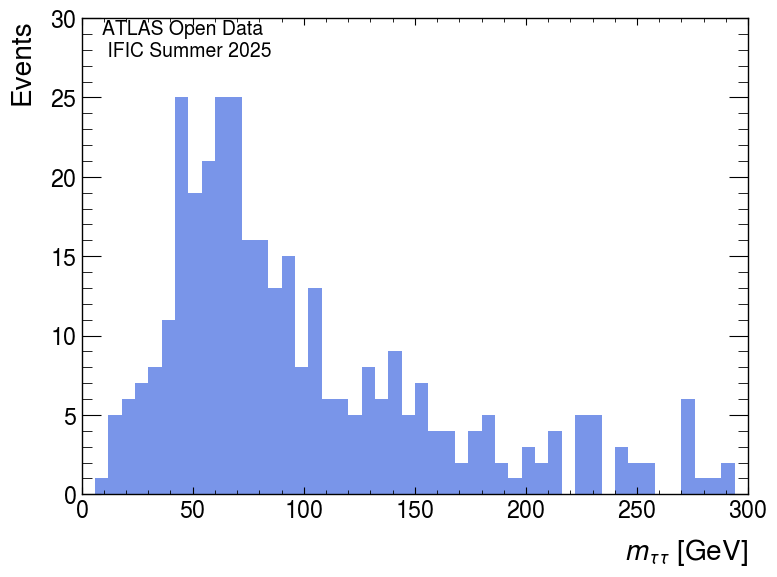

In [4]:
with uproot.open(ttbar) as file:
    tree = file["analysis"]  # Remplace par le vrai nom du TTree si différent
    # Chargement des variables utiles
    arrays = tree.arrays(["tau_pt", "tau_eta", "tau_phi", "tau_e", "tau_charge"], library="np")
    tau_pt = arrays["tau_pt"]
    tau_eta = arrays["tau_eta"]
    tau_phi = arrays["tau_phi"]
    tau_e = arrays["tau_e"]
    tau_charge = arrays["tau_charge"]

# Calcul des masses invariantes
invmasses = []

for i in range(len(tau_pt)):
    if len(tau_pt[i]) < 2:
        continue
    # Prend les deux premiers taus
    pt1, eta1, phi1, e1 = tau_pt[i][0], tau_eta[i][0], tau_phi[i][0], tau_e[i][0]
    pt2, eta2, phi2, e2 = tau_pt[i][1], tau_eta[i][1], tau_phi[i][1], tau_e[i][1]

   # print("pt1 =", pt1, "e1 =", e1, "eta1 =", eta1, "phi1 =", phi1)
    #print("pt2 =", pt2, "e2 =", e2, "eta2 =", eta2, "phi2 =", phi2)
    if tau_charge[i][0] * tau_charge[i][1] >= 0:
        continue  # Ne conserve que les paires de charge opposée
    # Fonction pour 4-vecteur
    def pvec(pt, eta, phi, e):
        px = pt * np.cos(phi)
        py = pt * np.sin(phi)
        pz = pt * np.sinh(eta)
        return np.array([e, px, py, pz])

    v1 = pvec(pt1, eta1, phi1, e1)
    v2 = pvec(pt2, eta2, phi2, e2)
    p_tot = v1 + v2
    mass2 = p_tot[0]**2 - np.sum(p_tot[1:]**2)
    mass = np.sqrt(mass2) if mass2 > 0 else 0
    invmasses.append(mass )  #  GeV

# Tracé
plt.figure(figsize=(8, 6))
plt.hist(invmasses, bins=50, range=(0, 300), histtype='stepfilled', color='royalblue', alpha=0.7)
plt.xlabel(r"$m_{\tau\tau}$ [GeV]")
plt.ylabel("Events")
plt.text(0.03, 0.92, "ATLAS Open Data\n IFIC Summer 2025", transform=plt.gca().transAxes, fontsize=14)
plt.tight_layout()
plt.show()

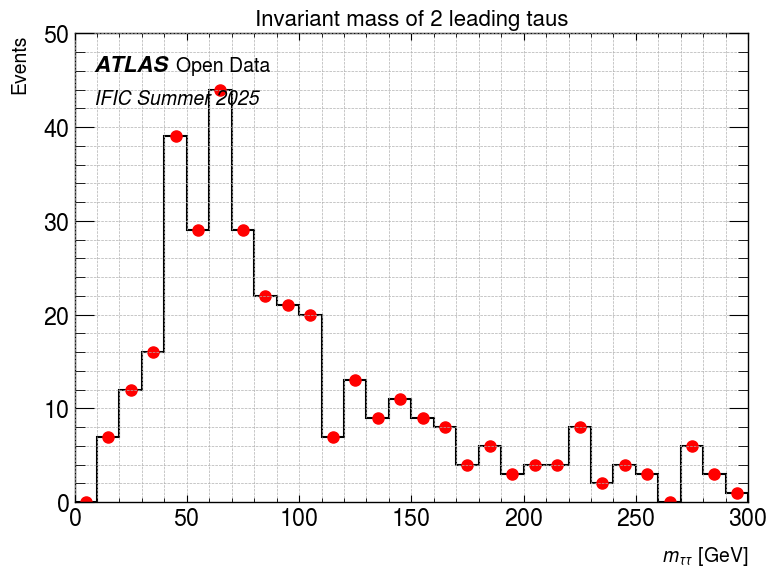

In [9]:
import matplotlib.patches as patches
plt.figure(figsize=(8, 6))
#plt.hist(invmasses, bins=50, range=(0, 300), histtype='step', color='black', linewidth=1.5)
counts, bins, patches = plt.hist(invmasses, bins=30,range=(0, 300), histtype='step', color='black', linewidth=1.5)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Ajout des points au centre des bins
plt.plot(bin_centers, counts, 'o', color='red', label='Points')
plt.xlabel(r"$m_{\tau\tau}$ [GeV]", fontsize=14, labelpad=10)
plt.ylabel("Events", fontsize=14, labelpad=10)
plt.title("Invariant mass of 2 leading taus", fontsize=16)

# Ajout du texte ATLAS
plt.text(0.03, 0.92, "ATLAS", transform=plt.gca().transAxes, fontsize=16, fontweight='bold', fontstyle='italic')
plt.text(0.15, 0.92, "Open Data", transform=plt.gca().transAxes, fontsize=14)
plt.text(0.03, 0.85, "IFIC Summer 2025", transform=plt.gca().transAxes, fontsize=14, style='italic')


# Ajout d'une grille
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()